In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r'./dataset/pyramid/3.pyradics_new_balance_feature81.csv')

In [3]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [5]:
import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,accuracy_score

In [6]:

X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.4,random_state=0,stratify=y)

train_data=lgb.Dataset(X_train,label=y_train)
validation_data=lgb.Dataset(X_test,label=y_test)
params={
    'learning_rate':0.1,
    'lambda_l1':0.1,
    'lambda_l2':0.2,
    'max_depth':4,
    'objective':'multiclass',
    'num_class':3,  #lightgbm.basic.LightGBMError: b‘Number of classes should be specified and greater than 1 for multiclass training‘
}

clf=lgb.train(params,train_data,valid_sets=[validation_data])

y_pred=clf.predict(X_test)
y_pred=[list(x).index(max(x)) for x in y_pred]
print(y_pred)
print(accuracy_score(y_test,y_pred))

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002567 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23333
[LightGBM] [Info] Number of data points in the train set: 322, number of used features: 237
[LightGBM] [Info] Start training from score -0.891750
[LightGBM] [Info] Start training from score -2.555676
[LightGBM] [Info] Start training from score -0.668606
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's multi_logloss: 0.835766
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's multi_logloss: 0.777368
[LightGBM] [Warning]

<Figure size 1200x600 with 0 Axes>

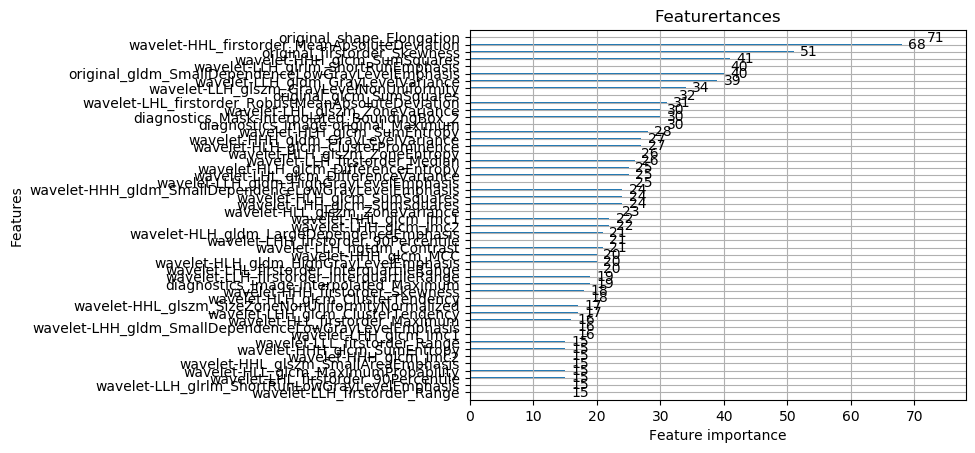

In [7]:
plt.figure(figsize=(12,6))
lgb.plot_importance(clf, max_num_features=50)
plt.title("Featurertances")
plt.show()

In [11]:
clf.feature_importance

<bound method Booster.feature_importance of <lightgbm.basic.Booster object at 0x000001F10D917F48>>

In [8]:
booster = clf
importance = booster.feature_importance(importance_type='split')
feature_name = booster.feature_name()
# for (feature_name,importance) in zip(feature_name,importance):
#     print (feature_name,importance) 
feature_importance = pd.DataFrame({
  'feature_name':feature_name,'importance':importance} )
feature_importance.to_csv('./dataset/lgm_pyrad_feature_importance_1.csv',index=False)